In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data preparation

In [2]:
df = pd.read_csv('/home/my_repos/learning-projects/ml-zoomcamp/midterm-project/spotify_songs.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [4]:
df.track_name.value_counts()

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64

track name with accent

In [5]:
df.track_album_name.value_counts()

track_album_name
Greatest Hits                  139
Ultimate Freestyle Mega Mix     42
Gold                            35
Malibu                          30
Rock & Rios (Remastered)        29
                              ... 
A Mouthful                       1
Blonde comme moi                 1
Every Second Counts              1
Birdy (Deluxe Version)           1
Typhoon/Storm                    1
Name: count, Length: 19743, dtype: int64

track album with special characters

In [6]:
artists_count = df.track_artist.value_counts()

In [7]:
artists_count

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: count, Length: 10692, dtype: int64

In [8]:
df.track_artist.tail(25)

32808                               Hardwell
32809                             Chris Lake
32810                           Gareth Emery
32811                                Qubicon
32812                                 Avicii
32813                               Borgeous
32814                               Vicetone
32815                             The Wanted
32816                                 Dannic
32817                       Armin van Buuren
32818                               CAZZETTE
32819                           Michael Brun
32820                                 Audien
32821                         Adventure Club
32822                         Sevyn Streeter
32823                               Hardwell
32824                                 Avicii
32825                                Showtek
32826                                 Tiësto
32827    Ferry Corsten feat. Jenny Wahlstrom
32828                           Lush & Simon
32829                         Tegan and Sara
32830     

artist name with uppercase and lowecase, ponctuation

In [9]:
df.playlist_genre.value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [10]:
df.playlist_subgenre.value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [11]:
df.track_album_release_date.tail(10)

32823    2014-04-18
32824    2013-01-01
32825    2013-01-01
32826    2014-04-22
32827          2013
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, dtype: object

we have date in different format

convert to datetime format

In [12]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')
df.track_album_release_date.tail(10)

32823   2014-04-18
32824   2013-01-01
32825   2013-01-01
32826   2014-04-22
32827          NaT
32828   2014-04-28
32829   2013-03-08
32830   2014-04-21
32831   2014-01-01
32832   2014-03-03
Name: track_album_release_date, dtype: datetime64[ns]

In [13]:
df.playlist_name.value_counts()

playlist_name
Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
                                                            ... 
CSR 103:9 (GTA: SA)                                            7
Big White Room-Jessie-J                                        7
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE                 6
ALPAS Music Festival                                           3
Post-Teen Pop                                                  1
Name: count, Length: 449, dtype: int64

playlist name with emoji and special characters

clean categorical values

Transform the object values for better visualization

In [14]:
import re

strings = list(df.dtypes[df.dtypes == 'object'].index)

def custom_replace(s):
    if pd.isnull(s):  # Handling NaN values
        return s
    s = s.lower()
    
    # Replace emojis and other special characters with '_'
    s = re.sub(r'[^\w\s-]', '_', s)
    
    # Replace white spaces and '-' with '_'
    s = re.sub(r'[\s-]+', '_', s)
    
    return s

for col in strings:
    df[col] = df[col].apply(custom_replace)

In [15]:
df.playlist_name.value_counts()

playlist_name
permanent_wave                                    470
urban_contemporary                                457
indie_poptimism                                   403
post_teen_pop                                     307
neo_soul                                          290
                                                 ... 
intro_to_permanent_wave                             8
big_white_room_jessie_j                             7
csr_103_9__gta__sa_                                 7
top_50_global_2020_updated_weekly____worldwide      6
alpas_music_festival                                3
Name: count, Length: 429, dtype: int64

In [16]:
df.track_artist.value_counts()

track_artist
martin_garrix       161
queen               136
the_chainsmokers    123
david_guetta        110
don_omar            102
                   ... 
rezarin               1
roberto_bates         1
finneas               1
hr__troels            1
mat_zo                1
Name: count, Length: 10684, dtype: int64

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
track_popularity,32833.0,42.477081,0.0,24.0,45.0,62.0,100.0,24.984074
track_album_release_date,30947,2012-09-09 04:27:27.668594688,1957-01-01 00:00:00,2010-12-04 00:00:00,2017-01-27 00:00:00,2019-05-16 00:00:00,2020-01-29 00:00:00,NaN
danceability,32833.0,0.65485,0.0,0.563,0.672,0.761,0.983,0.145085
energy,32833.0,0.698619,0.000175,0.581,0.721,0.84,1.0,0.18091
key,32833.0,5.374471,0.0,2.0,6.0,9.0,11.0,3.611657
loudness,32833.0,-6.719499,-46.448,-8.171,-6.166,-4.645,1.275,2.988436
mode,32833.0,0.565711,0.0,0.0,1.0,1.0,1.0,0.495671
speechiness,32833.0,0.107068,0.0,0.041,0.0625,0.132,0.918,0.101314
acousticness,32833.0,0.175334,0.0,0.0151,0.0804,0.255,0.994,0.219633
instrumentalness,32833.0,0.084747,0.0,0.0,0.000016,0.00483,0.994,0.22423


check the Null values


In [18]:
null_perc = (df.isna().sum()) / len(df) * 100

In [19]:
null_perc.round(3)

track_id                    0.000
track_name                  0.015
track_artist                0.015
track_popularity            0.000
track_album_id              0.000
track_album_name            0.015
track_album_release_date    5.744
playlist_name               0.000
playlist_id                 0.000
playlist_genre              0.000
playlist_subgenre           0.000
danceability                0.000
energy                      0.000
key                         0.000
loudness                    0.000
mode                        0.000
speechiness                 0.000
acousticness                0.000
instrumentalness            0.000
liveness                    0.000
valence                     0.000
tempo                       0.000
duration_ms                 0.000
dtype: float64

In [20]:
nan_rows = df[pd.isna(df['track_album_release_date'])]
nan_rows

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
151,2qtja4gbwe1acanb2p21ap,stay_the_night_featuring_hayley_williams_of_pa...,zedd,61,4xak0izxqhomv9wu1mdaay,clarity__deluxe_,NaT,dance_pop,37i9dqzf1dwzqaaqnmbbxa,pop,...,8,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347
749,77j9horxupwcjwra9jgvio,we_like_to_party___six_flags_,vengaboys,51,0r44mmtkue1xcugvvrpftz,we_like_to_party___the_vengabus_,NaT,90s_dance_hits,50cxvxgmgrvouelhkzcyio,pop,...,8,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227
750,6rq9qjpvineqszlh89lspj,coco_jamboo_radio_version,mr__president,18,2t8bc4qbseswbwoohghk8d,we_see_the_same_sun,NaT,90s_dance_hits,50cxvxgmgrvouelhkzcyio,pop,...,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733
751,5fgtdsf7i5lclthz2ptwvl,blue__da_ba_dee_,eiffel_65,16,65dysolrdg1lnsvrxcwqwn,europop,NaT,90s_dance_hits,50cxvxgmgrvouelhkzcyio,pop,...,7,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748
753,2ahnofp2lbbwdxcjbmastu,what_is_love,haddaway,70,0qtvjevp70yvqg4gctetof,what_is_love_remix,NaT,90s_dance_hits,50cxvxgmgrvouelhkzcyio,pop,...,7,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3iuco4cjmsaflpfly,faith_radio_edit,blasterjaxx,0,1izufytxnbjkzgawt7cfpm,faith,NaT,gym__melbourne_bounce_progressive_house_,5bqozpveqrdfzscvw1quya,edm,...,9,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067
32767,1h7lbcgfnsuee7qxrbwmip,push_play,zedd,39,4xak0izxqhomv9wu1mdaay,clarity__deluxe_,NaT,__edm_love_2020,6ji1gfr6anftt8mmtva2ux,edm,...,9,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360
32774,1ntvwyw9qdr30ei0phacni,lessons_in_love__feat__neon_trees_,kaskade,23,7r47eiktl01bmvi7nhdgca,fire___ice,NaT,__edm_love_2020,6ji1gfr6anftt8mmtva2ux,edm,...,7,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693
32775,454ziylncq09onjqe4ej6a,turn_it_down__with_rebecca___fiona__radio_edit,kaskade,13,0xiigd6kcgmsv9ccspjfur,i_love_you__man__bonus_track_version_,NaT,__edm_love_2020,6ji1gfr6anftt8mmtva2ux,edm,...,5,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  object        
 8   playlist_id               32833 non-null  object        
 9   playlist_genre            32833 non-null  object        
 10  playlist_subgenre         32833 non-null  object        
 11  danceability              32833 non-null  float64       
 12  energy            

In [22]:
df = df.drop(columns='track_album_release_date')

In [23]:
df = df.dropna(subset=['track_album_name', 'track_artist', 'track_name'])

In [24]:
df.isna().sum()

track_id             0
track_name           0
track_artist         0
track_popularity     0
track_album_id       0
track_album_name     0
playlist_name        0
playlist_id          0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [25]:
df.tempo.describe()

count    32828.000000
mean       120.883642
std         26.903632
min          0.000000
25%         99.961000
50%        121.984000
75%        133.918250
max        239.440000
Name: tempo, dtype: float64

How could a music have 0 tempo?

In [26]:
df_zero_tempo = df[df['tempo'] == 0]
df_zero_tempo

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nrcu68klqnfyaavp2j,hi__how_re_you_doin__,dreams_come_true,0,4wdk52jvu5gzhxw3rcz3av,dreams_come_true,city_pop_1985_シティーポップ,3j2osvmeceao5nmo9jz5df,rock,album_rock,...,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [27]:
df = df.drop(index=11363)

df_zero_tempo = df[df['tempo'] == 0]
df_zero_tempo

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


We have duplicated track_id ?

In [28]:
df.track_id.duplicated().sum()

4476

In [29]:
df = df.drop_duplicates(subset='track_id')

In [30]:
df.track_id.duplicated().sum()

0

export cleaned dataset

In [31]:
df.to_csv('spotify_song_cleaned.csv', index=False)

### EDA

<Axes: xlabel='duration_ms', ylabel='Count'>

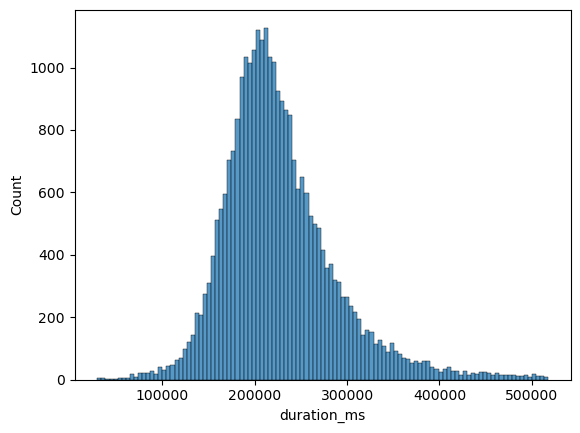

In [32]:
sns.histplot(df.duration_ms)

<Axes: xlabel='track_popularity', ylabel='Count'>

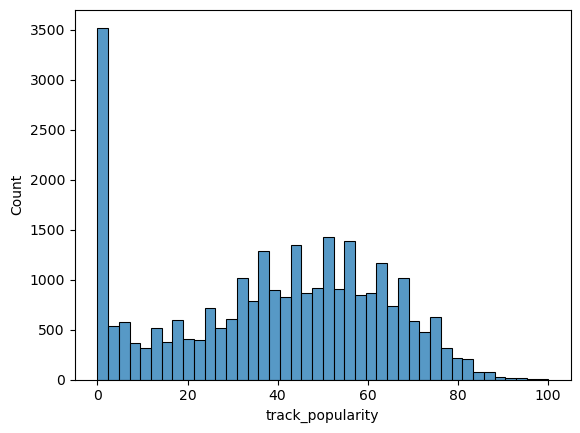

In [33]:
sns.histplot(df.track_popularity)

In [34]:
df.track_popularity.value_counts(normalize=True)

track_popularity
0      0.092237
1      0.019259
51     0.017072
57     0.016895
54     0.016719
         ...   
97     0.000106
95     0.000071
100    0.000035
96     0.000035
99     0.000035
Name: proportion, Length: 101, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

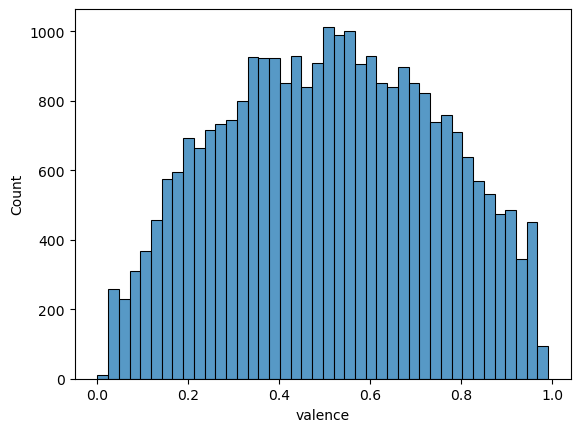

In [35]:
sns.histplot(df.valence)

<Axes: xlabel='playlist_genre', ylabel='track_popularity'>

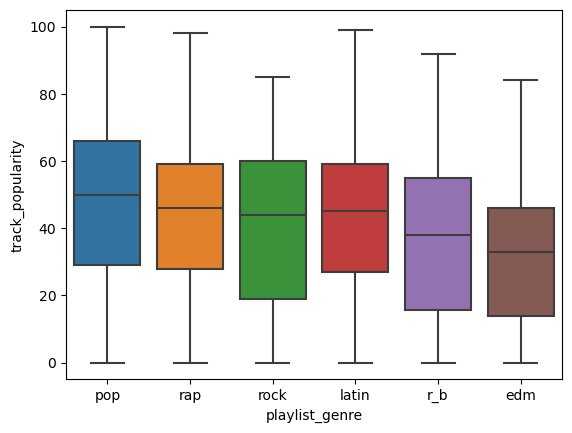

In [36]:
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')

<Axes: xlabel='playlist_genre', ylabel='duration_ms'>

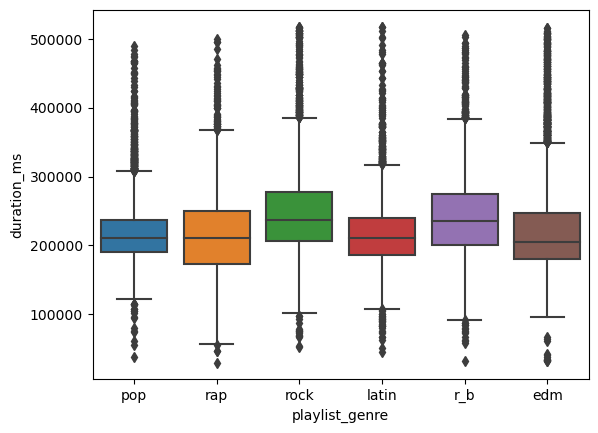

In [37]:
sns.boxplot(data=df, x='playlist_genre', y='duration_ms')

/root/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


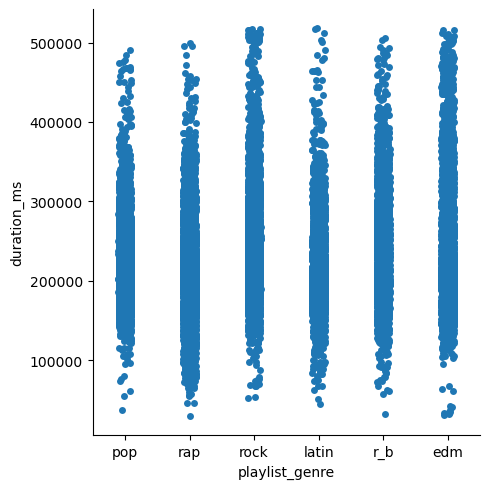

In [38]:
sns.catplot(data=df, x='playlist_genre', y='duration_ms')

<Axes: xlabel='key', ylabel='valence'>

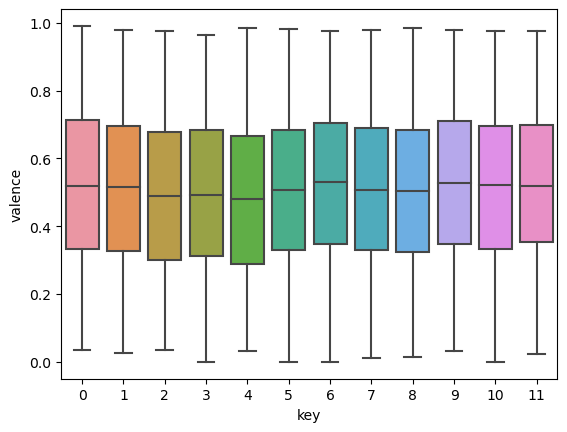

In [39]:
sns.boxplot(data=df, x='key', y='valence')

<Axes: xlabel='mode', ylabel='valence'>

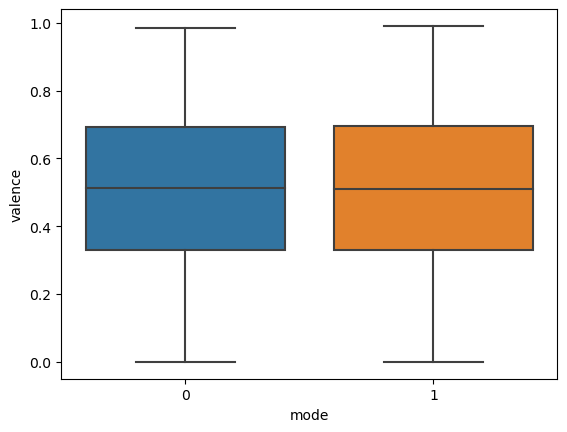

In [40]:
sns.boxplot(data=df, x='mode', y='valence')

Major and minor scales have both the same level of valence.

<Axes: >

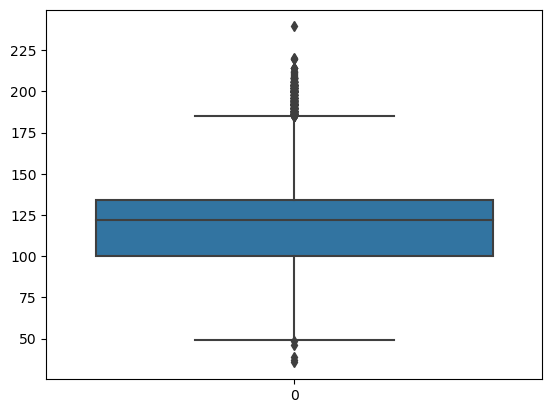

In [41]:
sns.boxplot(df.tempo)

<Axes: xlabel='tempo', ylabel='Count'>

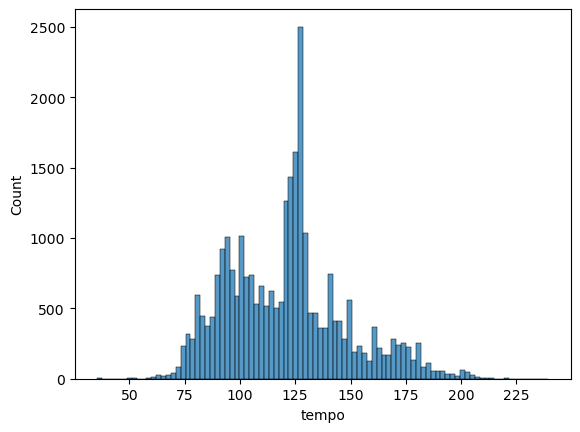

In [42]:
sns.histplot(df.tempo)

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28351 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           28351 non-null  object 
 1   track_name         28351 non-null  object 
 2   track_artist       28351 non-null  object 
 3   track_popularity   28351 non-null  int64  
 4   track_album_id     28351 non-null  object 
 5   track_album_name   28351 non-null  object 
 6   playlist_name      28351 non-null  object 
 7   playlist_id        28351 non-null  object 
 8   playlist_genre     28351 non-null  object 
 9   playlist_subgenre  28351 non-null  object 
 10  danceability       28351 non-null  float64
 11  energy             28351 non-null  float64
 12  key                28351 non-null  int64  
 13  loudness           28351 non-null  float64
 14  mode               28351 non-null  int64  
 15  speechiness        28351 non-null  float64
 16  acousticness       28351 no

In [44]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [45]:
categorical = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'playlist_name', 'playlist_id',
               'playlist_genre', 'playlist_subgenre']
numerical = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

Which features influence valence?

In [46]:
correlation = df[numerical].corr().round(3)

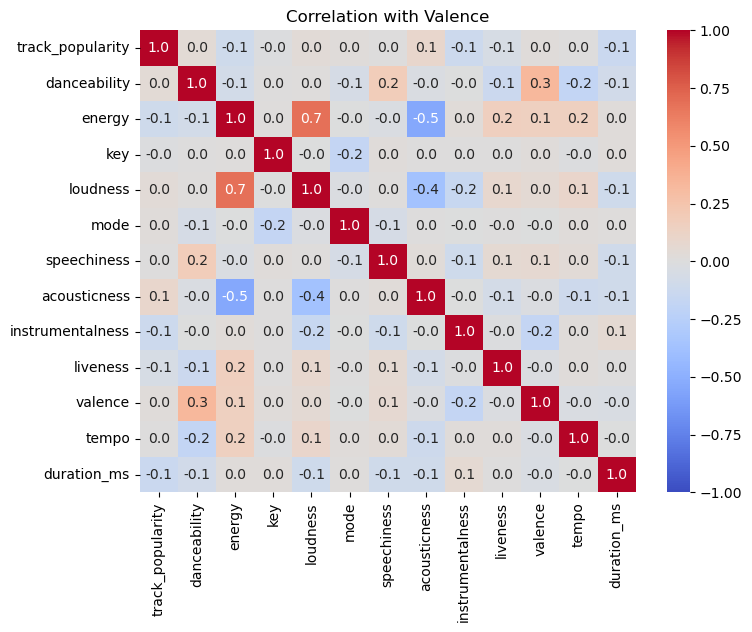

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.1f', vmin=-1, vmax=1)
plt.title('Correlation with Valence')
plt.show()

energy and danceability have little positive correlation with valence, more than other numerical variables
- loudness and energy have a strong positive correlation
- acousticness and energy have a negative correlation
- acousticness and loudness have a negative correlation


In [48]:
columns = ['track_popularity', 'danceability', 'energy', 
           'loudness', 'speechiness', 'valence', 'tempo']

In [49]:
df = df[columns]

### Linear Regression


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

split the dataset: 60 / 20 / 20

In [51]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [52]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [53]:
print(df_train.shape, df_val.shape, df_test.shape)

(17010, 7) (5670, 7) (5671, 7)


In [54]:
y_train = df_train.valence.values
y_val = df_val.valence.values
y_test = df_test.valence.values

In [55]:
del df_train['valence']
del df_val['valence']
del df_test['valence']

In [56]:
print(df_train.shape, df_val.shape, df_test.shape)

(17010, 6) (5670, 6) (5671, 6)


In [57]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [58]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

### Linear Regression

In [59]:
lr = LinearRegression(n_jobs=-1)

lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [60]:
y_pred = lr.predict(X_val)

lr_score = lr.score(X_val, y_val)
lr_score

0.1702521193921519

In [61]:
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(n_jobs=-1)>

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mse = np.sqrt(mean_squared_error(y_val, y_pred))
mse

0.2144372777406517

In [64]:
lr.coef_

array([ 5.68968152e-01,  3.59661155e-01, -1.18684141e-02,  2.05250343e-02,
        1.39519667e-04,  3.83252704e-04])

In [65]:
dv.feature_names_

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'tempo',
 'track_popularity']

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt = DecisionTreeRegressor()

In [68]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
y_pred = dt.predict(X_val)

In [70]:
mse = np.sqrt(mean_squared_error(y_val, y_pred))
mse

0.28319986449029105

In [71]:
dt.score(X_val, y_val)

-0.44721036289689264

In [72]:
dt.get_n_leaves()

16730

In [73]:
dt.get_depth()

38

In [74]:
dt.feature_importances_

array([0.2297081 , 0.1833746 , 0.14680602, 0.14590287, 0.19185241,
       0.10235601])

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
    }


In [77]:
gs = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

rmse_score = np.sqrt(-gs.best_score_)      # put - because scoring is the negative value of the MSE
print("Best cross-validation RMSE: {:.2f}".format(rmse_score))

best_tree = gs.best_estimator_
y_pred = best_tree.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred)
print("Val set RMSE: {:.2f}".format(np.sqrt(val_mse)))

Best cross-validation RMSE: 0.22
Val set RMSE: 0.22


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [80]:
val_mse = mean_squared_error(y_val, y_pred)
print("Val set RMSE: {:.2f}".format(np.sqrt(val_mse)))

Val set RMSE: 0.20


In [81]:
depths = [1, 2, 3, 4, 5, 10, 15, 20, None]

for depth in depths:
    rf = RandomForestRegressor(max_depth=depth)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    print('%4s -> %.3f' % (depth, rmse))

   1 -> 0.224
   2 -> 0.219
   3 -> 0.215
   4 -> 0.212
   5 -> 0.209
  10 -> 0.200
  15 -> 0.200
  20 -> 0.200
None -> 0.200


The best max_depth = 20

In [82]:
estimators = np.arange(1, 201, 10)

for n in estimators:
    rf = RandomForestRegressor(n_estimators=n)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    print('%4s -> %.3f' % (n, rmse))

   1 -> 0.283
  11 -> 0.208
  21 -> 0.202
  31 -> 0.202
  41 -> 0.201
  51 -> 0.201
  61 -> 0.201
  71 -> 0.200
  81 -> 0.201
  91 -> 0.200
 101 -> 0.200
 111 -> 0.199
 121 -> 0.200
 131 -> 0.200
 141 -> 0.200
 151 -> 0.200
 161 -> 0.199
 171 -> 0.199
 181 -> 0.199
 191 -> 0.200


In [83]:
# Let's try different max_depth and min_samples_leaf values

scores = []

for depth in [1, 5, 10, 15, 20]:
    for s in [1, 3, 5, 10]:
        
        rf = RandomForestRegressor(max_depth=depth,
                                   min_samples_leaf=s)

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)

        scores.append((depth, s, rmse))

In [84]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['rmse'])

df_scores_pivot.round(4)

rmse                                
max_depth             1       5       10      15      20
min_samples_leaf                                        
1                 0.2237  0.2081  0.1997  0.1993  0.1994
3                 0.2240  0.2084  0.1995  0.1988  0.1995
5                 0.2238  0.2083  0.1992  0.1990  0.1995
10                0.2238  0.2084  0.1995  0.1994  0.1991

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

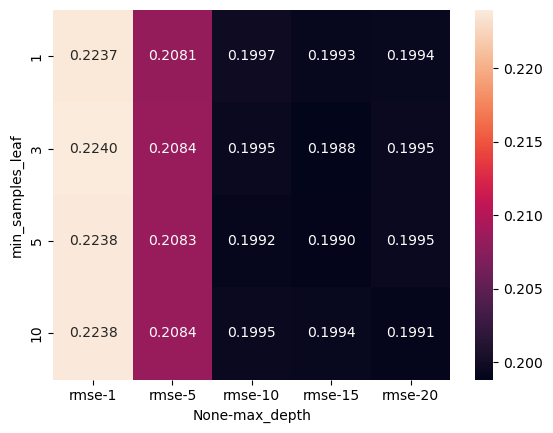

In [85]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')

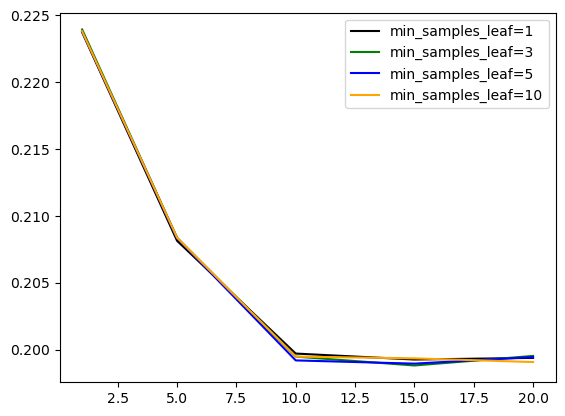

In [86]:
values = [1, 3, 5, 10]
colors = ['black', 'green', 'blue', 'orange']

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.max_depth, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%s' % s)

plt.legend()

The best values for our model

- max_depth = 10
- min_samples_leaf = 3
- num_estimators = 111

In [87]:
from sklearn.tree import export_text

features = dv.get_feature_names_out()
features

feature_importance = rf.feature_importances_

In [88]:
df_features = pd.DataFrame(list([features, feature_importance]))
df_features.T.sort_values(by=1, ascending=False)

,0,1
0,danceability,0.292326
4,tempo,0.20694
1,energy,0.191279
2,loudness,0.118989
3,speechiness,0.113089
5,track_popularity,0.077377


danceability is the most important feature

### XGBoost

In [89]:
import xgboost as xgb

In [90]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features)

dval = dtrain = xgb.DMatrix(X_val,
                     label=y_val,
                     feature_names=features)

In [91]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [92]:
y_pred = model.predict(dval)

In [93]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
rmse

0.17790045777950833

In [94]:
etas = [0.1, 0.01, 0.3]
max_depths = [3, 4, 6]
min_child_weights = [1, 10, 30]

watchlist = [(dtrain, 'train'), (dval, 'val')]

features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features)

dval = xgb.DMatrix(X_val,
                     label=y_val,
                     feature_names=features)

evals_result = {}

eta_scores = []
max_depth_scores = []
mcw_scores = []

for eta in etas:
    params = xgb_params.copy()
    params['eta'] = eta

    model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=200,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)
    
    rmse_scores = evals_result['val']['rmse']
    eta_scores.append(rmse_scores)

for depth in max_depths:
    params = xgb_params.copy()
    params['max_depth'] = depth

    model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=200,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)
    
    rmse_scores = evals_result['val']['rmse']
    max_depth_scores.append(rmse_scores)

for mcw in min_child_weights:
    params = xgb_params.copy()
    params['min_child_weights'] = mcw

    model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=200,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)
    
    rmse_scores = evals_result['val']['rmse']
    mcw_scores.append(rmse_scores)


[0]	train-rmse:0.22960	val-rmse:0.22960
[1]	train-rmse:0.22429	val-rmse:0.22429
[2]	train-rmse:0.21946	val-rmse:0.21946
[3]	train-rmse:0.21540	val-rmse:0.21540
[4]	train-rmse:0.21179	val-rmse:0.21179
[5]	train-rmse:0.20867	val-rmse:0.20867
[6]	train-rmse:0.20572	val-rmse:0.20572
[7]	train-rmse:0.20299	val-rmse:0.20299
[8]	train-rmse:0.20093	val-rmse:0.20093
[9]	train-rmse:0.19892	val-rmse:0.19892
[10]	train-rmse:0.19718	val-rmse:0.19718
[11]	train-rmse:0.19548	val-rmse:0.19548
[12]	train-rmse:0.19396	val-rmse:0.19396
[13]	train-rmse:0.19266	val-rmse:0.19266
[14]	train-rmse:0.19127	val-rmse:0.19127
[15]	train-rmse:0.19017	val-rmse:0.19017
[16]	train-rmse:0.18885	val-rmse:0.18885
[17]	train-rmse:0.18781	val-rmse:0.18781
[18]	train-rmse:0.18676	val-rmse:0.18676
[19]	train-rmse:0.18563	val-rmse:0.18563
[20]	train-rmse:0.18453	val-rmse:0.18453
[21]	train-rmse:0.18352	val-rmse:0.18352
[22]	train-rmse:0.18265	val-rmse:0.18265
[23]	train-rmse:0.18201	val-rmse:0.18201
[24]	train-rmse:0.18121	va

[28]	train-rmse:0.17805	val-rmse:0.17805
[29]	train-rmse:0.17754	val-rmse:0.17754
[30]	train-rmse:0.17690	val-rmse:0.17690
[31]	train-rmse:0.17621	val-rmse:0.17621
[32]	train-rmse:0.17574	val-rmse:0.17574
[33]	train-rmse:0.17511	val-rmse:0.17511
[34]	train-rmse:0.17446	val-rmse:0.17446
[35]	train-rmse:0.17389	val-rmse:0.17389
[36]	train-rmse:0.17352	val-rmse:0.17352
[37]	train-rmse:0.17317	val-rmse:0.17317
[38]	train-rmse:0.17279	val-rmse:0.17279
[39]	train-rmse:0.17240	val-rmse:0.17240
[40]	train-rmse:0.17165	val-rmse:0.17165
[41]	train-rmse:0.17151	val-rmse:0.17151
[42]	train-rmse:0.17116	val-rmse:0.17116
[43]	train-rmse:0.17067	val-rmse:0.17067
[44]	train-rmse:0.17041	val-rmse:0.17041
[45]	train-rmse:0.16987	val-rmse:0.16987
[46]	train-rmse:0.16962	val-rmse:0.16962
[47]	train-rmse:0.16897	val-rmse:0.16897
[48]	train-rmse:0.16870	val-rmse:0.16870
[49]	train-rmse:0.16845	val-rmse:0.16845
[50]	train-rmse:0.16799	val-rmse:0.16799
[51]	train-rmse:0.16743	val-rmse:0.16743
[52]	train-rmse:

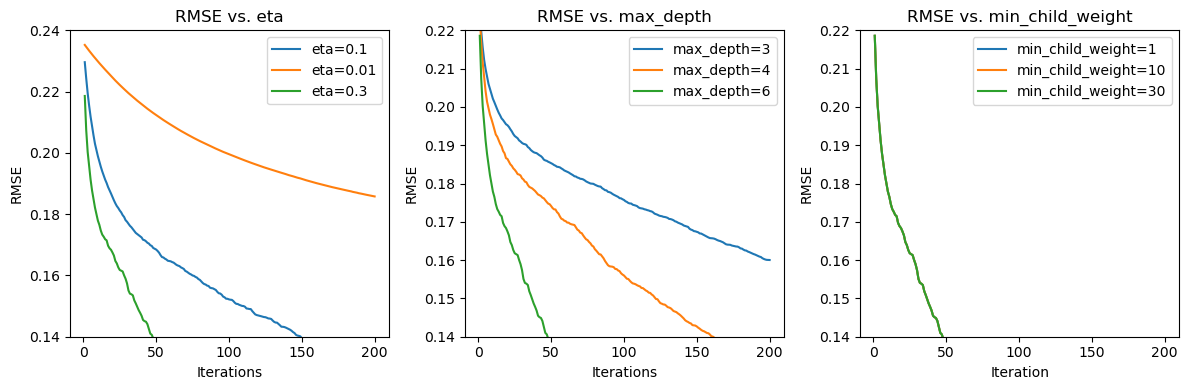

In [95]:

# Plot the RMSE scores for each parameter
plt.figure(figsize=(12, 4))
plt.subplot(131)
for i, eta in enumerate(etas):
    plt.plot(range(1, len(eta_scores[i]) + 1), eta_scores[i], label=f'eta={eta}')
plt.title('RMSE vs. eta')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.ylim(0.14, 0.24)
plt.legend()

plt.subplot(132)
for i, max_depth in enumerate(max_depths):
    plt.plot(range(1, len(max_depth_scores[i]) + 1), max_depth_scores[i], label=f'max_depth={max_depth}')
plt.title('RMSE vs. max_depth')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.ylim(0.14, 0.22)
plt.legend()

plt.subplot(133)
for i, min_child_weight in enumerate(min_child_weights):
    plt.plot(range(1, len(mcw_scores[i]) + 1), mcw_scores[i], label=f'min_child_weight={min_child_weight}')
plt.title('RMSE vs. min_child_weight')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.ylim(0.14, 0.22)
plt.legend()

plt.tight_layout()
plt.show()

    eta =  0.3
    max_depth = 6
    min_child_weight = 1

### Best model

In [118]:
df = pd.read_csv('/home/my_repos/learning-projects/ml-zoomcamp/midterm-project/spotify_song_cleaned.csv')

In [119]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [120]:
columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 
             'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
             'tempo', 'duration_ms']

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.valence.values
y_test = df_test.valence.values

train_dicts = df_train[columns].to_dict(orient='records')
test_dicts = df_test[columns].to_dict(orient='records')

In [121]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

evals_result = {}

features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features)

dtest = xgb.DMatrix(X_test,
                     label=y_test,
                     feature_names=features)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(params=xgb_params, 
                      dtrain=dtrain, 
                      num_boost_round=50,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)

test_rmse_scores = evals_result['test']['rmse']
train_rmse_scores = evals_result['train']['rmse']

[0]	train-rmse:0.21967	test-rmse:0.21983
[1]	train-rmse:0.21024	test-rmse:0.21196
[2]	train-rmse:0.20380	test-rmse:0.20674
[3]	train-rmse:0.19899	test-rmse:0.20257
[4]	train-rmse:0.19529	test-rmse:0.20026
[5]	train-rmse:0.19203	test-rmse:0.19808
[6]	train-rmse:0.18982	test-rmse:0.19658
[7]	train-rmse:0.18762	test-rmse:0.19531
[8]	train-rmse:0.18555	test-rmse:0.19402
[9]	train-rmse:0.18394	test-rmse:0.19325
[10]	train-rmse:0.18269	test-rmse:0.19266
[11]	train-rmse:0.18100	test-rmse:0.19185
[12]	train-rmse:0.17972	test-rmse:0.19148
[13]	train-rmse:0.17853	test-rmse:0.19117
[14]	train-rmse:0.17766	test-rmse:0.19089
[15]	train-rmse:0.17659	test-rmse:0.19058
[16]	train-rmse:0.17569	test-rmse:0.19034
[17]	train-rmse:0.17509	test-rmse:0.19033
[18]	train-rmse:0.17401	test-rmse:0.19018
[19]	train-rmse:0.17325	test-rmse:0.18998
[20]	train-rmse:0.17233	test-rmse:0.18991
[21]	train-rmse:0.17175	test-rmse:0.18981
[22]	train-rmse:0.17111	test-rmse:0.18973
[23]	train-rmse:0.17046	test-rmse:0.18951
[2

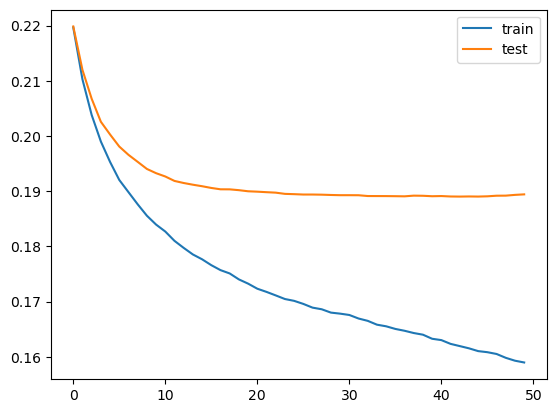

In [122]:
plt.plot(train_rmse_scores, label='train')
plt.plot(test_rmse_scores, label='test')
plt.legend()
plt.show()